In [1]:
import pandas as pd
import numpy as np
from semopy import Model, Optimizer
from semopy.inspector import inspect
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
n_samples = 300
Factor1 = np.random.normal(0, 1, n_samples)
Factor2 = np.random.normal(0, 1, n_samples)

In [4]:
Var1 = 0.8 * Factor1 + np.random.normal(0, 0.2, n_samples)
Var2 = 0.7 * Factor1 + np.random.normal(0, 0.2, n_samples)
Var3 = 0.9 * Factor1 + np.random.normal(0, 0.2, n_samples)
Var4 = 0.8 * Factor2 + np.random.normal(0, 0.2, n_samples)
Var5 = 0.7 * Factor2 + np.random.normal(0, 0.2, n_samples)
Var6 = 0.9 * Factor2 + np.random.normal(0, 0.2, n_samples)

In [5]:
data = pd.DataFrame({
    "Var1": Var1,
    "Var2": Var2,
    "Var3": Var3,
    "Var4": Var4,
    "Var5": Var5,
    "Var6": Var6
})

In [14]:
model_description = """
# Measurement model
Factor1 =~ 1*Var1 + Var2 + Var3
Factor2 =~ 1*Var4 + Var5 + Var6

# Factor variances
Factor1 ~~ Factor1
Factor2 ~~ Factor2

# Factor covariance
Factor1 ~~ Factor2

# Error variances
Var1 ~~ Var1
Var2 ~~ Var2
Var3 ~~ Var3
Var4 ~~ Var4
Var5 ~~ Var5
Var6 ~~ Var6
"""

In [15]:
model = Model(model_description)
model.fit(data)

SolverResult(fun=0.026677798886858284, success=True, n_it=38, x=array([ 0.89683463,  1.14569111,  0.8706628 ,  1.11416332,  0.60863397,
       -0.0224305 ,  0.59225565,  0.03694224,  0.04308016,  0.03840786,
        0.03591853,  0.04147002,  0.03536058]), message='Optimization terminated successfully', name_method='SLSQP', name_obj='MLW')

In [16]:
estimates = model.inspect()
print("\nParameter Estimates:")
print(estimates)


Parameter Estimates:
       lval  op     rval  Estimate  Std. Err    z-value  p-value
0      Var1   ~  Factor1  1.000000         -          -        -
1      Var2   ~  Factor1  0.896835  0.020441   43.87426      0.0
2      Var3   ~  Factor1  1.145691  0.022755  50.348572      0.0
3      Var4   ~  Factor2  1.000000         -          -        -
4      Var5   ~  Factor2  0.870663  0.020131  43.250653      0.0
5      Var6   ~  Factor2  1.114163   0.02217  50.254726      0.0
6   Factor1  ~~  Factor1  0.608634  0.052771  11.533488      0.0
7   Factor1  ~~  Factor2 -0.022430  0.035406  -0.633526  0.52639
8   Factor2  ~~  Factor2  0.592256  0.051354  11.532795      0.0
9      Var1  ~~     Var1  0.036942  0.004952   7.460465      0.0
10     Var2  ~~     Var2  0.043080  0.004728   9.112629      0.0
11     Var3  ~~     Var3  0.038408  0.006034   6.365658      0.0
12     Var4  ~~     Var4  0.035919  0.004874   7.369681      0.0
13     Var5  ~~     Var5  0.041470  0.004491   9.233088      0.0
14 

In [17]:
loadings_data = estimates[estimates['op'] == '=~']
loading_vars = loadings_data['rval'].tolist()
loading_values = loadings_data['Estimate'].tolist()

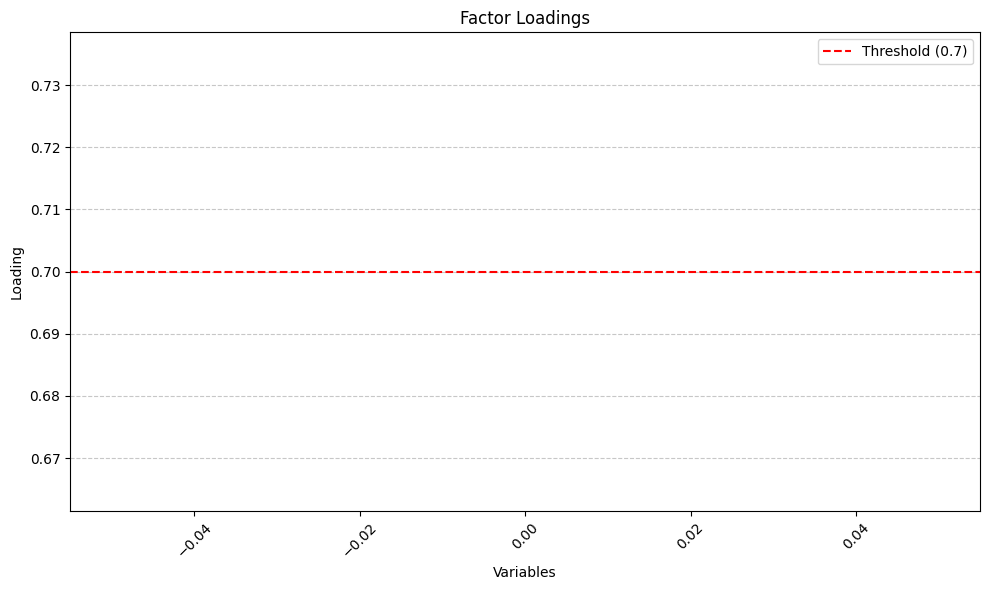

In [18]:
plt.figure(figsize=(10, 6))
plt.bar(loading_vars, loading_values, color='skyblue')
plt.title('Factor Loadings')
plt.xlabel('Variables')
plt.ylabel('Loading')
plt.axhline(y=0.7, color='r', linestyle='--', label='Threshold (0.7)')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
try:
    fit_measures = model.inspect_fit()
    print("\nModel Fit Statistics:")
    for measure, value in fit_measures.items():
        print(f"{measure}: {value:.3f}")
except:
    print("\nFit measures not available")


Fit measures not available
